### Assignment[-1] : The last assignment

목적: 학습된 모델을 불러와서 이미지를 테스트 해봅니다. 

In [20]:
import socket
hostname = socket.gethostname()
print(hostname)

seung-BMDX5


In [21]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [22]:
tf.__version__, tf.keras.__version__

('2.3.0', '2.4.0')

In [23]:
from nnutil_20 import imshow
from nnutil_20 import center_crop
from nnutil_20 import random_crop

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

### 학습된 모델 불러오기

In [25]:
model_fn = 'handpose_224.h5'

In [26]:
model = keras.models.load_model(model_fn)

잘 불러와졌는지 확인해봅니다.  

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [28]:
n_classes = model.get_layer('dense_1').output_shape[-1] 
print(n_classes)
# 마지막 레이어의 형상이 6인데, 이를 클래스 갯수로 활용
# https://stackoverflow.com/a/49527269

6


### 테스트 할 사진 불러오기 

테스트 용으로 제공하였습니다 

In [121]:
import glob
types = ('*.jpg', '*.JPG', '*.png') # the tuple of file types
files_grabbed = []

for fmt in types:
    files_grabbed.extend(glob.glob('./dataset_test/'+fmt))

In [122]:
print('#인덱스\t파일이름')
for idx,fn in enumerate(files_grabbed):
    print(idx, '\t', fn)

#인덱스	파일이름
0 	 ./dataset_test/test_10.jpg
1 	 ./dataset_test/test_05.jpg
2 	 ./dataset_test/test_06.jpg
3 	 ./dataset_test/test_02.jpg
4 	 ./dataset_test/test_01.jpg
5 	 ./dataset_test/test_09.jpg
6 	 ./dataset_test/test_08.jpg
7 	 ./dataset_test/test_04.jpg
8 	 ./dataset_test/test_11.jpg
9 	 ./dataset_test/test_15.jpg
10 	 ./dataset_test/test_07.jpg
11 	 ./dataset_test/test_16.jpg
12 	 ./dataset_test/test_13.jpg
13 	 ./dataset_test/test_14.jpg
14 	 ./dataset_test/test_12.jpg
15 	 ./dataset_test/test_03.jpg


**아래의 idx 변수를 바꾸어** 기존 제공된 데이터를 테스트해보세요

In [54]:
idx = 8 #인덱스를 위의 셀 결과를 참고하여 바꾸어 보세요. 
fn_test = files_grabbed[idx] 
print(fn_test)

./dataset_test/test_11.jpg


In [55]:
f=1.0# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))
print(target_size)

(300, 400)


In [56]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
input_arr = keras.preprocessing.image.img_to_array(img)

input_arr = input_arr/255.0
print(input_arr.shape)

(300, 400, 3)


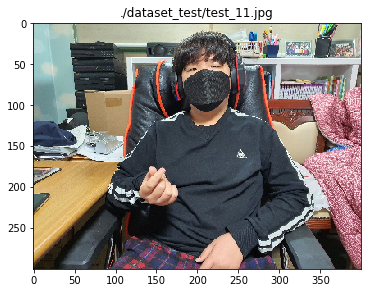

In [57]:
imshow(input_arr, title=fn_test)

### 이미지를 정사각형으로 잘라서 테스트 해보기 

실제 학습할 때 아래처럼 정사각형 형태로 잘라서 학습을 하였습니다. 

In [58]:
# 아래의 숫자를 변경하지 마세요.
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

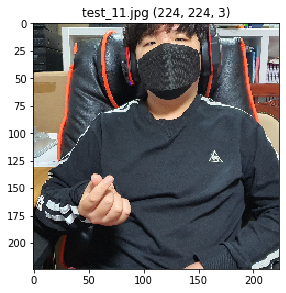

In [59]:
img_square = center_crop(input_arr, crop_size=(w,w))
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))

In [60]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [61]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'test_11.jpg/ Pred.: #4 --> 99.1223%')

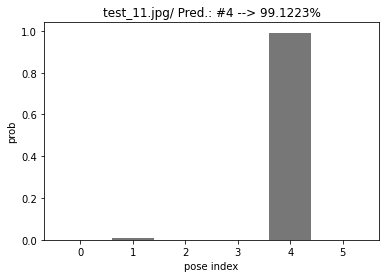

In [62]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, 
                                              max_prob*100.0))

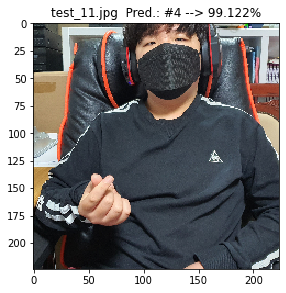

In [63]:
imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))


### TODO 

이미지를 바꾸어가며 테스트를 해보세요. 여러분이 새롭게 사진을 찍고 넣은 뒤 테스트 해보세요. 이미지는 아래 폴더에 넣어두면 됩니다.


        dataset_test


주의 1: Dataset 과제로 제출한 사진이 아니어야함.

주의 2: 본 과제에서는 제한된 분량의 사진을 이용하여 비교적 단순한 네트워크를 학습하였습니다.

따라서 모든 hand gesture 를 이해할 수 있지는 못합니다. 여러분의 학습 목적을 위해 구성된 코드이므로 가급적 과제에서 찍었던 것과 유사한 구도로 찍어보면 이해에 도움이 될 것입니다.

주의 3 : 리눅스 시스템은 파일명의 대소문자를 구분합니다. 확장자가 jpg 인지, JPG 인지 확인해보세요

아래 두 셀의 내용을 지우고 위의 예처럼 본인의 사진 혹은 본인이 찍은 사진을 올리고 성공적으로 되는 예, 실패하는 예를 각각 구현해주세요. 그리고 실패가 되었다면, 어떤 클래스로 분류가 되었는데, 그 이유는 무엇일지 각각 고찰해주세요.

### 성공적으로 추론 되는 예 (1.5 pts)

#### 예시 1번

In [66]:
fn_test = 'dataset_test/test_12.jpg'  # 여러분의 새로운 파일로 대체해주세요. 
print(fn_test)

#raise NotImplementedError # 이 줄은 구현이 되면 삭제 해주세요

dataset_test/test_12.jpg


In [67]:
f=1.1# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))
print(target_size)

(272, 363)


In [68]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
input_arr = keras.preprocessing.image.img_to_array(img)

input_arr = input_arr/255.0
print(input_arr.shape)

(272, 363, 3)


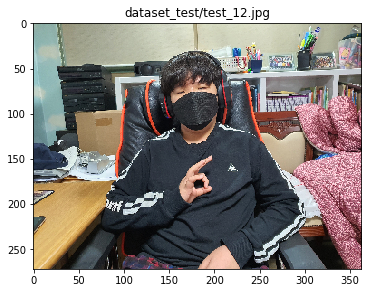

In [69]:
imshow(input_arr, title=fn_test)

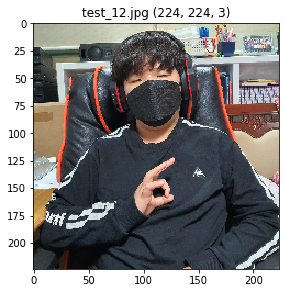

In [70]:
# 아래의 숫자를 변경하지 마세요.
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

img_square = center_crop(input_arr, crop_size=(w,w))
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))

In [71]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [72]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'test_12.jpg/ Pred.: #0 --> 100.0000%')

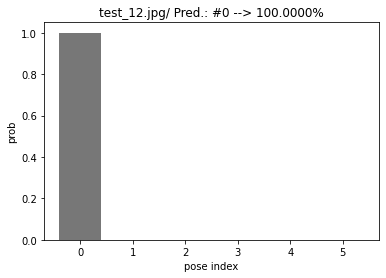

In [73]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, 
                                              max_prob*100.0))

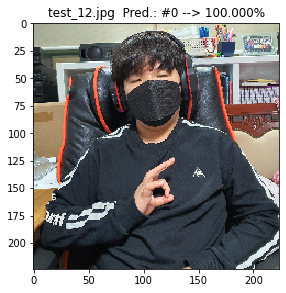

In [74]:
imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))


#### 예시 2번

- 오른손으로 포즈를 취해 찍은 사진이 전부 다 올바르게 분류 되어, 오른손이 아닌 왼손으로 포즈를 취해도 분류가 되는지 확인해보았습니다.

In [228]:
fn_test = 'dataset_test/test_18.jpg' # 여러분의 새로운 파일로 대체해주세요. 
print(fn_test)
#raise NotImplementedError  # 이 줄은 구현이 되면 삭제 해주세요

dataset_test/test_18.jpg


In [229]:
f=1.2# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))
print(target_size)

(250, 333)


In [230]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
input_arr = keras.preprocessing.image.img_to_array(img)

input_arr = input_arr/255.0
print(input_arr.shape)

(250, 333, 3)


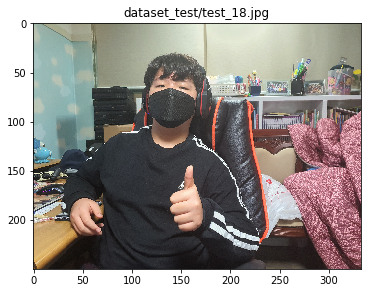

In [231]:
imshow(input_arr, title=fn_test)

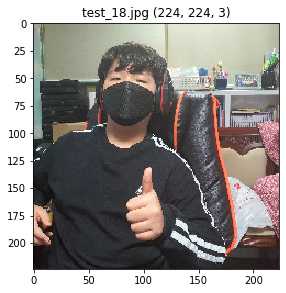

In [232]:
# 아래의 숫자를 변경하지 마세요.
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

img_square = center_crop(input_arr, crop_size=(w,w))
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))

In [233]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [234]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'test_18.jpg/ Pred.: #1 --> 98.6272%')

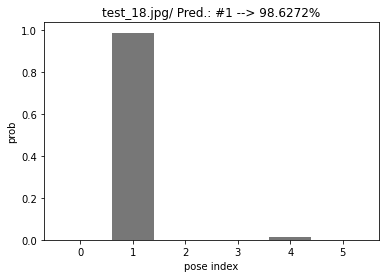

In [235]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, 
                                              max_prob*100.0))

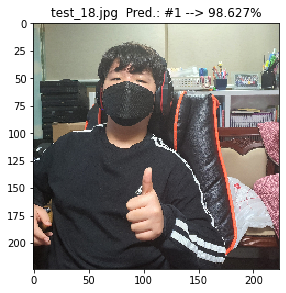

In [236]:
imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))


### 추론 실패하는 예 (1.5 pts)

- 오른손으로 포즈를 취해 찍은 사진이 전부 다 올바르게 분류 되어, 오른손이 아닌 왼손으로 포즈를 취해도 분류가 되는지 확인해보았습니다.

#### 예시 1번

In [361]:
fn_test = 'dataset_test/test_19.jpg' # 여러분의 새로운 파일로 대체해주세요. 
print(fn_test)
#raise NotImplementedError  # 이 줄은 구현이 되면 삭제 해주세요

dataset_test/test_19.jpg


In [362]:
f=1.1# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))
print(target_size)

(272, 363)


In [363]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
input_arr = keras.preprocessing.image.img_to_array(img)

input_arr = input_arr/255.0
print(input_arr.shape)

(272, 363, 3)


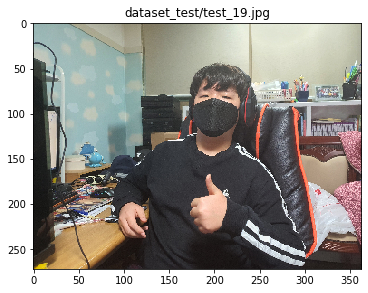

In [364]:
imshow(input_arr, title=fn_test)

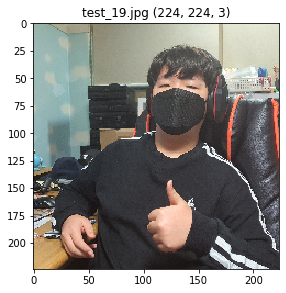

In [365]:
# 아래의 숫자를 변경하지 마세요.
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

img_square = center_crop(input_arr, crop_size=(w,w))
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))

In [366]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [367]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'test_19.jpg/ Pred.: #4 --> 56.4424%')

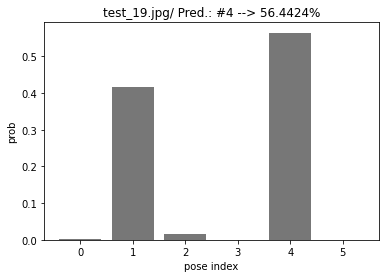

In [368]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, 
                                              max_prob*100.0))

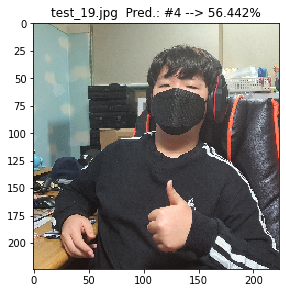

In [369]:
imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))


* 추론 실패한 이유? 

    :  1번이 아닌 4번으로 분류되었다.(1번과 확률 차이는 많이 나지는 않지만 4번 56.44%로 판정남.) 
    오른손이 아닌 왼손으로 포즈를 취한 사진이라 분류가 잘 안되나 생각했지만 성공 사례 2번을 통해 그 이유가 아님을 확인하였다. 추론이 실패한 이유는 엄지의 모양이 정면이 아닌 옆모습을 보여줌으로써, 작은 하트(손가락하트)를 만들 때 모습과 유사하였다고 생각됨. 

#### 예시 2번

In [282]:
fn_test = 'dataset_test/test_24.jpg' # 여러분의 새로운 파일로 대체해주세요. 
print(fn_test)
#raise NotImplementedError  # 이 줄은 구현이 되면 삭제 해주세요

dataset_test/test_24.jpg


In [283]:
f=1.2# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))
print(target_size)

(250, 333)


In [284]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
input_arr = keras.preprocessing.image.img_to_array(img)

input_arr = input_arr/255.0
print(input_arr.shape)

(250, 333, 3)


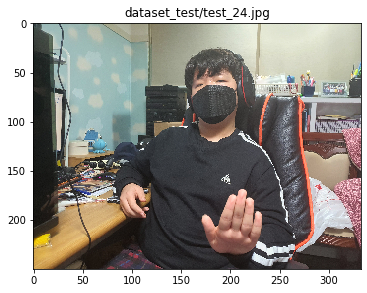

In [285]:
imshow(input_arr, title=fn_test)

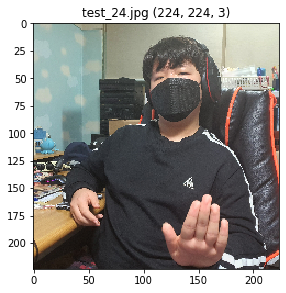

In [286]:
# 아래의 숫자를 변경하지 마세요.
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

img_square = center_crop(input_arr, crop_size=(w,w))
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))

In [287]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [288]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'test_24.jpg/ Pred.: #4 --> 99.9257%')

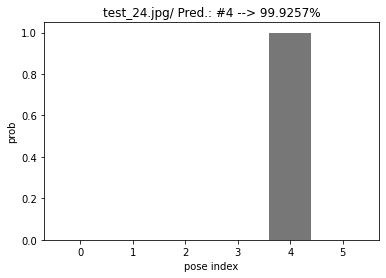

In [289]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, 
                                              max_prob*100.0))

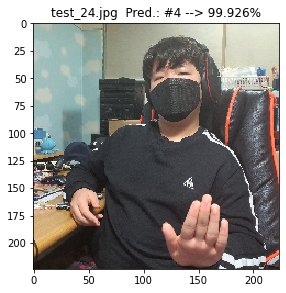

In [290]:
imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))


* 추론 실패 이유?

    :  5번이 아닌 4번이라고 99.926%라는 높은 확률로 분류되었다. 이렇게 분류 된 이유는 사진의 포즈가 카메라에 가까워 손모양이 뚜렷하게(전부 다) 보이지 않는다는 점과 손가락을 쫙 핀 상태가 아닌 오므린 점이라고 생각이 된다. 오므리게 되면서 엄지 손가락과 나머지 손가락 부분의 여백을 통해 4번 작은 하트(손가락 하트)라고 분류가 되지 않았나 생각이 된다. 
    
     <img src = 'handpose01.PNG' />